<a href="https://colab.research.google.com/github/peiyulin0520/KPMG-virtual-intern-tasks/blob/update/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#upload data
from google.colab import files
uploaded = files.upload()

Saving KPMG_VI_New_raw_data_update_final.xlsx to KPMG_VI_New_raw_data_update_final.xlsx


In [27]:
#load data
Transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =1, header = 1)
NewCustomerList = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =2, header = 1)
CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =3, header = 1)
CustomerAddress = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =4, header = 1)

<ipython-input-27-c1b227bbac12>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  NewCustomerList = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =2, header = 1)
<ipython-input-27-c1b227bbac12>:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =3, header = 1)


---
Task2: get data insight by Data Exploration, Model Development and Interpretation.
---
The datasets provided inlcude Transactions, CustomerDemographic, CustomerAddress, and NewCustomerList.


# Data Exploration

Create a variable (purchased_or_not) in CustomerDemographic dataset to observe whether the customer have made a record in Transactions dataset or not.

In [28]:
# get the list of customer_id in Transactions dataset
id_in_trans = Transactions['customer_id']
# create a boolean varaible (purchased_or_not) in CustomerDemographic dataset
CustomerDemographic['purchased_or_not'] = (CustomerDemographic['customer_id'].isin(id_in_trans))
# CustomerDemographic['purchased_or_not']=CustomerDemographic['purchased_or_not'].\
#                                           replace([True, False], [1, 0])
CustomerDemographic['purchased_or_not'].value_counts()

True     3493
False     507
Name: purchased_or_not, dtype: int64

In [29]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

[nan, 82.0, 79.0, 69.0, 68.0, 67.0, 66.0, 65.0, 64.0, 63.0, 62.0]


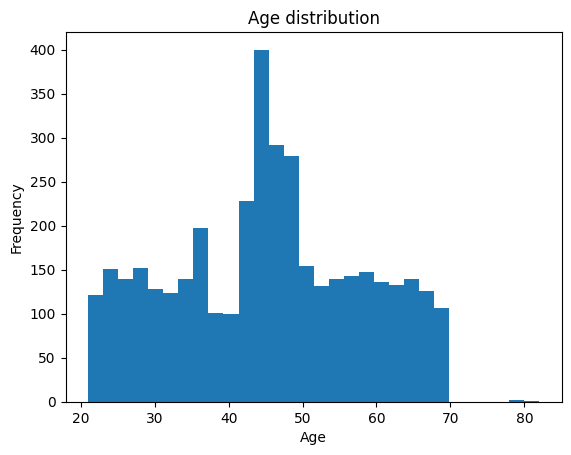

Gender categories:  ['F' 'M' 'U']
wealth_segment:  ['Mass Customer' 'Affluent Customer' 'High Net Worth']
deceased_indicator:  [False  True]
owns_car:  [ True False]


In [56]:
# clean CustomerDemographic dataset
## copy the original dataset CustomerDemographic
CustomerDemographic1 = CustomerDemographic
## DOB: used for Age calculation
### use the datetime package and check the datetime now
from datetime import datetime
now = datetime.now()
### calculate the age
CustomerDemographic1['age'] = (now - CustomerDemographic1['DOB']).astype('<m8[Y]')

## check age
age_cust = sorted(CustomerDemographic1['age'].unique(), reverse=True)
print(age_cust[0:11])
plt.hist(CustomerDemographic1['age'], bins=30)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## job_title and job_industry_category
### fill NaN data with 'Unknown'
CustomerDemographic1['job_industry_category'] = CustomerDemographic1['job_industry_category'].fillna('Unknown')
CustomerDemographic1['job_title'] = CustomerDemographic1['job_title'].fillna('Unknown')

## check the uniqueness for these columns
print('Gender categories: ', CustomerDemographic1['gender'].unique())
print('wealth_segment: ', CustomerDemographic1['wealth_segment'].unique())
print('deceased_indicator: ', CustomerDemographic1['deceased_indicator'].unique())
print('owns_car: ', CustomerDemographic1['owns_car'].unique())

## Modify value to make each value representative and in the uniform format
CustomerDemographic1['gender'].replace(['Male', 'Female', 'Femal'], ['M', 'F', 'F'], inplace=True)

CustomerDemographic1['deceased_indicator'].unique() # N; Y
CustomerDemographic1['deceased_indicator'].replace(['N', 'Y'], [False,True], inplace=True)

CustomerDemographic1['owns_car'].unique() # N; Y
CustomerDemographic1['owns_car'].replace(['No', 'Yes'], [False,True], inplace=True)

## Australian Bureau of Statistics: the highest male life expectancy is 82.7 yrs
## the highest female life expectancy is 86.3 yrs
## drop rows that the age exceeds the data shown on the website: 
CustomerDemographic1.drop(CustomerDemographic1[(CustomerDemographic1['age']>82.7)&\
                          (CustomerDemographic1['gender'] == 'M')].index,\
                          inplace=True)
CustomerDemographic1.drop(CustomerDemographic1[(CustomerDemographic1['age']>86.3)&\
                          (CustomerDemographic1['gender'] == 'F')].index,\
                          inplace=True)
# for gender U, I set the life expectancy gate the same as F to keep more data
CustomerDemographic1.drop(CustomerDemographic1[(CustomerDemographic1['age']>86.3)&\
                          (CustomerDemographic1['gender'] == 'U')].index,\
                          inplace=True)

## fill NaN in tenure and age with their mean
tenure_mean = CustomerDemographic1['tenure'].mean()
age_mean = CustomerDemographic1['age'].mean()
CustomerDemographic1['tenure'].fillna(tenure_mean, inplace=True)
CustomerDemographic1['age'].fillna(age_mean, inplace=True)

## drop column that is not useful for classification
CustomerDemographic1 = CustomerDemographic1.drop(columns=['first_name', \
                                                        'last_name', 'default',\
                                                        'DOB', 'job_title'])
# transform variables to dummy variables
CustomerDemographic2 = CustomerDemographic1
CustomerDemographic2 = pd.get_dummies(data=CustomerDemographic1,\
                            columns=['gender', 'job_industry_category',\
                                     'wealth_segment'])

# remove one categories in each group to avoid multicollinearity and also customer_id
CustomerDemographic2.drop(columns=['customer_id','gender_U',\
                                   'job_industry_category_Unknown',\
                                   'wealth_segment_Affluent Customer'],\
                           inplace=True)

In [39]:
CustomerDemographic2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   past_3_years_bike_related_purchases       3997 non-null   int64  
 1   deceased_indicator                        3997 non-null   bool   
 2   owns_car                                  3997 non-null   bool   
 3   tenure                                    3997 non-null   float64
 4   purchased_or_not                          3997 non-null   bool   
 5   age                                       3997 non-null   float64
 6   gender_F                                  3997 non-null   uint8  
 7   gender_M                                  3997 non-null   uint8  
 8   job_industry_category_Argiculture         3997 non-null   uint8  
 9   job_industry_category_Entertainment       3997 non-null   uint8  
 10  job_industry_category_Financial Serv

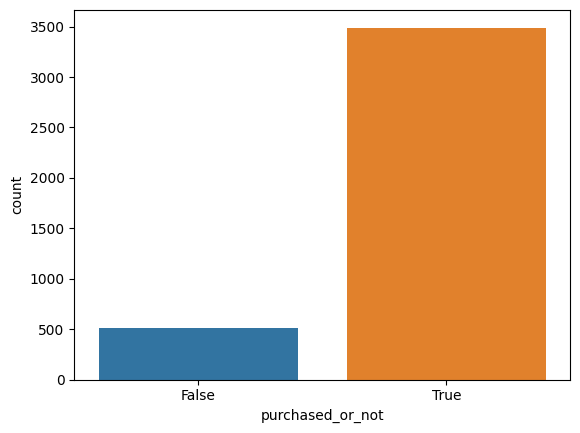

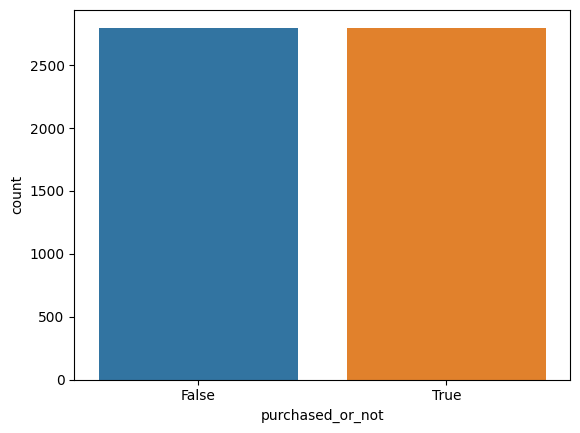

[-3.67957874]
[[-1.98662653e-03 -1.30590776e+00 -6.01939243e-01  1.51679496e-02
  -9.60546037e-03  2.78937300e+00  3.18319176e+00  2.30988186e+00
   2.44885419e+00  2.25006281e+00  2.30947236e+00  3.48805348e+00
   2.18040245e+00  2.05115805e+00  1.92737873e+00  2.00275859e+00
   1.38061591e+00  1.10092449e+00]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
# load required packages
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

# over sampling
## view the overall target varaible - purchased_or_not
sns.countplot(x='purchased_or_not', data=CustomerDemographic2)
plt.show()
## get the train and test datasets
X = CustomerDemographic2.loc[:, CustomerDemographic2.columns != 'purchased_or_not']
y = CustomerDemographic2.loc[:, CustomerDemographic2.columns == 'purchased_or_not']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['purchased_or_not'])

# check whether the data is balanced after oversampling
sns.countplot(x='purchased_or_not', data=os_data_y)
plt.show()

# build a Logistic Regression model
# first time try
# logit_model=sm.Logit(os_data_y,sm.add_constant(os_data_X))
# result=logit_model.fit()
# print(result.summary())
# second time try
# model = LogisticRegression()
# model.fit(os_data_X, os_data_y)
# os_data_X = sm.add_constant(os_data_X)
# logit_model = sm.Logit(os_data_y, os_data_X)
# result = logit_model.fit()
# p_values = result.pvalues

model = LogisticRegression(solver='liblinear', random_state=0).fit(os_data_X, os_data_y)

intercept = model.intercept_
coefficients = model.coef_
print(intercept)
print(coefficients)
# # cross validation:
# logreg = LogisticRegression()
# scores = cross_val_score(logreg, os_data_X, os_data_y, cv=5)
# print('cross-validation scores: ', scores)
# print('mean accuracy: ', scores.mean())
# print('standard deviation: ', scores.std())

# get the accuracy of the model
accuracy_train = model.score(os_data_X,os_data_y)
accuracy_test = model.score(X_test,y_test)
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]
report = classification_report(y_test, y_pred)


In [61]:
print(accuracy_train, accuracy_test)
print(report)

0.8379778492318686 0.77375
              precision    recall  f1-score   support

       False       0.12      0.11      0.12       109
        True       0.86      0.88      0.87       691

    accuracy                           0.77       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.76      0.77      0.77       800



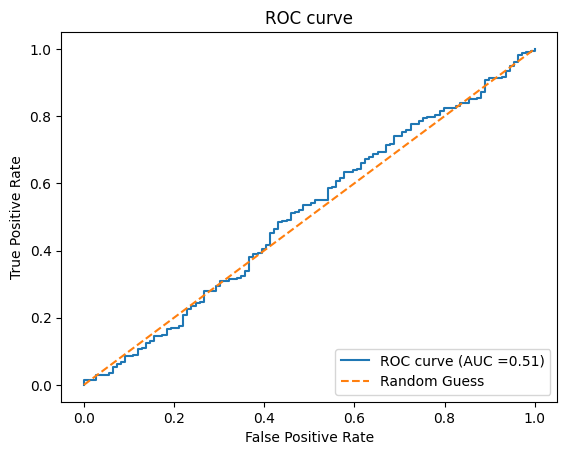

In [62]:
# plot ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label ='ROC curve (AUC =%0.2f)' %roc_auc)
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [54]:
# try svm
from sklearn import svm
from sklearn.metrics import accuracy_score
clf = svm.SVC(kernel='rbf')
clf.fit(os_data_X, os_data_y)
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(os_data_X)

accuracy_test_svm = accuracy_score(y_test, y_pred_test)
accuracy_train_svm = accuracy_score(os_data_y, y_pred_train)

print(accuracy_train_svm, accuracy_test_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6059306895319757 0.58125


In [57]:
CustomerDemographic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3997 non-null   int64  
 1   gender                               3997 non-null   object 
 2   past_3_years_bike_related_purchases  3997 non-null   int64  
 3   job_industry_category                3997 non-null   object 
 4   wealth_segment                       3997 non-null   object 
 5   deceased_indicator                   3997 non-null   bool   
 6   owns_car                             3997 non-null   bool   
 7   tenure                               3997 non-null   float64
 8   purchased_or_not                     3997 non-null   bool   
 9   age                                  3997 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(3)
memory usage: 261.5+ KB


In [65]:
# try decision trees
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import mutual_info_classif

# clf = DecisionTreeClassifier()
# clf.fit(os_data_X, os_data_y)
# importances = clf.feature_importances_
# feature_importance_df = pd.DataFrame({'Feature': os_data_X.columns, \
#                                       'Importance':importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance',\
#                                                           ascending=False)
# print(feature_importance_df)


# info_gain = mutual_info_classif(os_data_X, os_data_y)
# for i, feature in enumerate(os_data_X.columns):
#   print(f'Feature: {feature}, Information Gain:{info_gain[i]}')

                                     Feature  Importance
5                                   gender_F    0.183662
0        past_3_years_bike_related_purchases    0.178325
4                                        age    0.145574
3                                     tenure    0.120302
6                                   gender_M    0.069910
16             wealth_segment_High Net Worth    0.042481
17              wealth_segment_Mass Customer    0.036647
11                  job_industry_category_IT    0.035979
9   job_industry_category_Financial Services    0.033205
12       job_industry_category_Manufacturing    0.028938
10              job_industry_category_Health    0.026845
2                                   owns_car    0.024229
14              job_industry_category_Retail    0.021895
13            job_industry_category_Property    0.016903
7          job_industry_category_Argiculture    0.013271
8        job_industry_category_Entertainment    0.010139
15  job_industry_category_Telec

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature: past_3_years_bike_related_purchases, Information Gain:0.023038902165716246
Feature: deceased_indicator, Information Gain:0.0
Feature: owns_car, Information Gain:0.021983078800584144
Feature: tenure, Information Gain:0.34735408693628944
Feature: age, Information Gain:0.36001979432955755
Feature: gender_F, Information Gain:0.015067308524786771
Feature: gender_M, Information Gain:0.044997626229154264
Feature: job_industry_category_Argiculture, Information Gain:0.0
Feature: job_industry_category_Entertainment, Information Gain:0.0005552097217464969
Feature: job_industry_category_Financial Services, Information Gain:0.022508408060110785
Feature: job_industry_category_Health, Information Gain:0.012967819315775841
Feature: job_industry_category_IT, Information Gain:0.003922557622601852
Feature: job_industry_category_Manufacturing, Information Gain:0.02172448155102069
Feature: job_industry_category_Property, Information Gain:0.011268788958853637
Feature: job_industry_category_Retail, 

In [66]:
# merge three of the datasets firstly: use inner join because the purpose is to target customers, who would make a purchase
# keep all customer data
all_data = CustomerDemographic1.merge(Transactions, how='left', on='customer_id').merge(CustomerAddress, how='inner', on='customer_id')

In [67]:
all_data.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,purchased_or_not,age,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation
0,1,F,93,Health,Mass Customer,False,True,11.0,True,69.0,...,medium,medium,235.63,125.07,38482.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,1,F,93,Health,Mass Customer,False,True,11.0,True,69.0,...,medium,medium,1577.53,826.51,39526.0,060 Morning Avenue,2016,New South Wales,Australia,10
2,1,F,93,Health,Mass Customer,False,True,11.0,True,69.0,...,low,small,1720.70,1531.42,37823.0,060 Morning Avenue,2016,New South Wales,Australia,10
3,1,F,93,Health,Mass Customer,False,True,11.0,True,69.0,...,medium,medium,360.40,270.30,37873.0,060 Morning Avenue,2016,New South Wales,Australia,10
4,1,F,93,Health,Mass Customer,False,True,11.0,True,69.0,...,medium,medium,71.49,53.62,38573.0,060 Morning Avenue,2016,New South Wales,Australia,10


In [68]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20451 entries, 0 to 20450
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20451 non-null  int64         
 1   gender                               20451 non-null  object        
 2   past_3_years_bike_related_purchases  20451 non-null  int64         
 3   job_industry_category                20451 non-null  object        
 4   wealth_segment                       20451 non-null  object        
 5   deceased_indicator                   20451 non-null  bool          
 6   owns_car                             20451 non-null  bool          
 7   tenure                               20451 non-null  float64       
 8   purchased_or_not                     20451 non-null  bool          
 9   age                                  20451 non-null  float64       
 10  transactio

From the overview, we can conclude that some customer_id in Transactions are not in CustomerDemographic or CustomerAddress, so the number of data jump from 20,000 to 19,968. The following step is data preprocessing.
1. Handle unreasonable data
2. Handle missing values
3. Change data type: online_order (bool), online_status (bool), deceased_indicator (bool), owns_car (bool), and postcode (str)
4. Add additional variables: Age, number of transactions, profit for each transaction, sum profit gain from each customer

In [122]:
# Data Preprocessing - handle unreasonable data
all_data_clean = all_data
## check order status
print('order_status','\n', all_data_clean['order_status'].value_counts()) 
# includes 'Approved' 'Cancelled'

## drop rows that are unreasonable
all_data_clean = all_data_clean.drop(all_data_clean[(\
                  all_data_clean['order_status'] == 'Cancelled')].index)

## country
print('the number of country: ' + str(all_data_clean['country'].nunique())) 
# only 1 unique country

## state
print('state list','\n', all_data_clean['state'].unique()) 
## modify data to make it uniform
all_data_clean['state'].replace(['New South Wales', 'Victoria'], ['NSW', 'VIC'],\
                                inplace=True)
## verify the outcome
print('Verify state list','\n', all_data_clean['state'].unique()) 

## address
print('the number of address: ' + str(all_data_clean['address'].nunique())) 

## customer_id
issue_value= [i for i in range(1, 4001)]
print(len(all_data_clean[~all_data_clean['customer_id'].isin(issue_value)])) # 0
all_data_clean['customer_id'].agg(['max', 'min']) # max:4000; min:1
## the outcome shows no unreasinable data after left join Transactions data to CustomerDemographic 

## drop columns that are not useful
all_data_clean = all_data_clean.drop(columns=['country', 'order_status',\
                                              'address'])

order_status 
 Approved     19766
Cancelled      178
Name: order_status, dtype: int64
the number of country: 1
state list 
 ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
Verify state list 
 ['NSW' 'QLD' 'VIC']
the number of address: 3989
0


Unreasonable data:
1. order_status: shouldn't consider transactions that are cancelled, and remove the feature once drop rows that are Cancelled.
2. state: have different categories for the same definition
3. address: 3,989 unique addresses. The address is too many for data clustering
4. country: each customer comes from Australia, so it is not useful to include country for clustering or analysis

In [123]:
all_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20273 entries, 0 to 20450
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20273 non-null  int64         
 1   gender                               20273 non-null  object        
 2   past_3_years_bike_related_purchases  20273 non-null  int64         
 3   job_industry_category                20273 non-null  object        
 4   wealth_segment                       20273 non-null  object        
 5   deceased_indicator                   20273 non-null  bool          
 6   owns_car                             20273 non-null  bool          
 7   tenure                               20273 non-null  float64       
 8   purchased_or_not                     20273 non-null  bool          
 9   age                                  20273 non-null  float64       
 10  transactio

Add addditional varaibles:
1. n_transactions: the number of transactions a customer has made
2. profit: list_price - standard_cost
3. sum_profit: the sum of the profits from each transactions a customer has made
4. total_spend: the amount that the customer have spent to purchase bike relevant products

In [124]:
# Data preprocessing - add addirional features
# fill NaN in transaction_id with 0
all_data_clean['transaction_id'].fillna(0, inplace=True)
# calculate the number of transaction for each customer_id
all_data_clean['n_transactions'] = all_data_clean.groupby('customer_id')\
                                      ['transaction_id'].transform('count')

# calculate the profit of each transaction
all_data_clean['profit'] = all_data_clean['list_price'] - \
                             all_data_clean['standard_cost']  

# calculate the sum of profit earned from each customer
all_data_clean['sum_profit'] = all_data_clean.groupby('customer_id')\
                                      ['profit'].transform('sum')

# calculate the spending power each customer has                                     
all_data_clean['total_spend'] = all_data_clean.groupby('customer_id')\
                                ['list_price'].transform('sum')                              

In [82]:
# -- not use
# get how many people don't have a transaction record
# all_data[all_data[['transaction_id']].isna().any(axis=1)]['customer_id'].nunique()
# # 507 existing customers haven't made a purchase

# # create a variable: n_transaction to get the number of transaction a customer has made
# print(0 in all_data['transaction_id'].values) # 0 is not in transaction_id
# # fill NaN values in transaction_id with 0
# all_data['transaction_id'].fillna(0, inplace=True)
# all_data['n_transaction'] = all_data.groupby('customer_id')['transaction_id'].\
#                             transform(lambda x: (x!=0).sum())                      
# # check whether the function works well
# # all_data['customer_id'].value_counts().get(4000,0)

# # create a boolean variable: purchase_or_not
# all_data['purchase_or_not'] = (all_data['n_transaction'] > 0)
# --

In [125]:
all_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20273 entries, 0 to 20450
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20273 non-null  int64         
 1   gender                               20273 non-null  object        
 2   past_3_years_bike_related_purchases  20273 non-null  int64         
 3   job_industry_category                20273 non-null  object        
 4   wealth_segment                       20273 non-null  object        
 5   deceased_indicator                   20273 non-null  bool          
 6   owns_car                             20273 non-null  bool          
 7   tenure                               20273 non-null  float64       
 8   purchased_or_not                     20273 non-null  bool          
 9   age                                  20273 non-null  float64       
 10  transactio

Missing values:
1. online_order: not an important feature when identified new target customers
2. brand; product_line; product_class; product_size; product_first_sold_date; standard_cost: they all belong to product_id=0, and not useful to identify new target customers
3. last_name : not an important feature for data clustering
4. DOB: not an important feature after getting the age feature
5. job_title: Fill NaN with 'Unknown' category
6. job_industry_category: Fill NaN with 'Unknown' category
7. default: not helpful because it does not contain meaningful text or data
8. tenure: remove missing value to avoid misleading clustering result

In [132]:
# Data preprocessing - handle missing data
## online_order variable: not important for getting new targeted customers

## brand; product_line; product_class; product_size and product_first_sold_date;  
## standard_cost have same amount of missing data
## get the data, which is NaN in these columns
miss_df = Transactions[Transactions[['brand', 'product_line', 'product_class',\
                                     'product_size', \
                                     'standard_cost',\
                                     'product_first_sold_date']].\
                       isna().any(axis=1)]
print('number of unique data:\n', miss_df.nunique())
print('\nproduct_id is: ', int(miss_df['product_id'].unique()))

## remove features that are unnecessary
all_data_clean1 = all_data_clean.drop(columns=['brand', 'product_line',\
                                               'product_class','product_size', \
                                               'standard_cost',\
                                               'product_first_sold_date'])

## fill NaN in profit with 0 if transaction_id is 0 as well (means no transaction)
all_data_clean1.loc[all_data_clean1['transaction_id'] == 0, 'profit'] =\
 all_data_clean1.loc[all_data_clean1['transaction_id'] == 0, 'profit'].fillna(0)

number of unique data:
 transaction_id             197
product_id                   1
customer_id                192
transaction_date           154
online_order                 2
order_status                 2
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                 196
standard_cost                0
product_first_sold_date      0
dtype: int64

product_id is:  0


In [133]:
all_data_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20273 entries, 0 to 20450
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20273 non-null  int64         
 1   gender                               20273 non-null  object        
 2   past_3_years_bike_related_purchases  20273 non-null  int64         
 3   job_industry_category                20273 non-null  object        
 4   wealth_segment                       20273 non-null  object        
 5   deceased_indicator                   20273 non-null  bool          
 6   owns_car                             20273 non-null  bool          
 7   tenure                               20273 non-null  float64       
 8   purchased_or_not                     20273 non-null  bool          
 9   age                                  20273 non-null  float64       
 10  transactio

In [134]:
# remove some variables not used in the clustering and modelling 
all_data_clean1.drop(columns=['transaction_date', 'online_order'], inplace=True)

# remove rows that profit is still NaN (have transaction but don't have price and cost information)
all_data_clean1.dropna(subset=['profit'], inplace=True)

# check product_id and list_price
missing_df = all_data_clean1[all_data_clean1[['product_id', 'list_price']].isna().any(axis=1)]
print("the transaction_id that doesn't have product_id or list_price: " +\
      str(missing_df['transaction_id'].unique())) # is only 0, meaning no transaction

# fill NaN in product_id with None
all_data_clean1['product_id'] = all_data_clean1['product_id'].astype(str)
all_data_clean1['product_id'].fillna('None', inplace=True)

# fill NaN in list_price with 0
all_data_clean1['list_price'].fillna(0, inplace=True)

the transaction_id that doesn't have product_id or list_price: [0.]


In [135]:
all_data_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20080 entries, 0 to 20450
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          20080 non-null  int64  
 1   gender                               20080 non-null  object 
 2   past_3_years_bike_related_purchases  20080 non-null  int64  
 3   job_industry_category                20080 non-null  object 
 4   wealth_segment                       20080 non-null  object 
 5   deceased_indicator                   20080 non-null  bool   
 6   owns_car                             20080 non-null  bool   
 7   tenure                               20080 non-null  float64
 8   purchased_or_not                     20080 non-null  bool   
 9   age                                  20080 non-null  float64
 10  transaction_id                       20080 non-null  float64
 11  product_id                  

In [143]:
# double check the categories in each object variable to make sure not have multi-representation
for i in all_data_clean1.columns:
  if all_data_clean1[i].dtype == object:
    print(i + ": " + str(all_data_clean1[i].unique()))

gender: ['F' 'M' 'U']
job_industry_category: ['Health' 'Financial Services' 'IT' 'Unknown' 'Retail' 'Argiculture'
 'Property' 'Manufacturing' 'Telecommunications' 'Entertainment']
wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
product_id: ['86.0' '38.0' '47.0' '72.0' '2.0' '25.0' '23.0' '31.0' '32.0' '9.0'
 '11.0' '1.0' '85.0' '26.0' '95.0' '62.0' '34.0' '84.0' '39.0' '96.0'
 '13.0' '0.0' '54.0' '77.0' '12.0' '5.0' '22.0' '15.0' '3.0' '76.0' '4.0'
 '89.0' '45.0' '59.0' '36.0' '69.0' '6.0' '28.0' '10.0' '30.0' '91.0'
 '44.0' '66.0' '17.0' '49.0' '92.0' '56.0' '68.0' '67.0' '41.0' '33.0'
 '81.0' '94.0' '99.0' '78.0' '70.0' '87.0' '97.0' '40.0' '16.0' '7.0'
 '48.0' '37.0' '53.0' '52.0' '18.0' '80.0' '57.0' '79.0' '63.0' '19.0'
 '82.0' '65.0' '46.0' '74.0' '21.0' '43.0' '8.0' '20.0' '98.0' '27.0'
 '14.0' '60.0' '35.0' '73.0' '93.0' '55.0' '100.0' '50.0' '29.0' '83.0'
 '75.0' '71.0' '64.0' '24.0' '58.0' '51.0' '61.0' '90.0' '88.0' '42.0'
 'nan']
state: ['NSW' 'QLD' '

In [205]:
# change data type
all_data_clean2 = all_data_clean1
all_data_clean2['postcode'] = all_data_clean2['postcode'].astype(str)

# one hot encoding
all_data_clean2 = pd.get_dummies(data=all_data_clean2, \
                                 columns=['job_industry_category','state',\
                                          'gender', 'wealth_segment'])

# remove customer_id
all_data_clean2.drop(columns=['customer_id', 'transaction_id', 'postcode', \
                              'product_id'], inplace=True)

In [206]:
print('the number of duplicated rows: ',all_data_clean2.duplicated().sum())
all_data_clean2.drop_duplicates(inplace=True)

the number of duplicated rows:  621


In [207]:
all_data_clean2.head()
print('the number of columns: ',len(all_data_clean2.columns))

the number of columns:  31


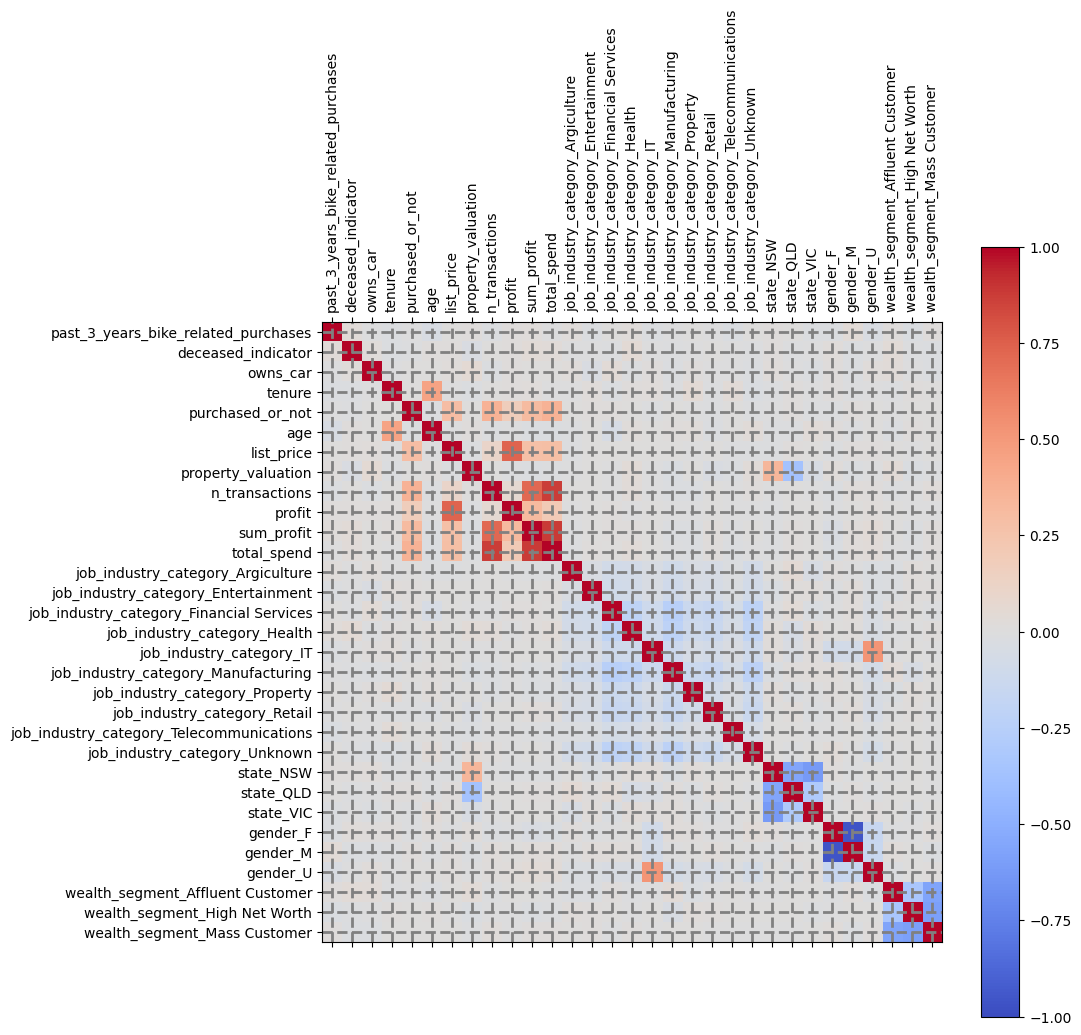

The highly correlated combinations
 ('n_transactions', 'total_spend')
The highly correlated combinations
 ('gender_F', 'gender_M')
The highly correlated combinations
 ('sum_profit', 'total_spend')
('n_transactions', 'total_spend') correlation value is:  0.8708639139599484
('gender_F', 'gender_M') correlation value is:  0.9559363970919879
('sum_profit', 'total_spend') correlation value is:  0.8759619977663173


<ipython-input-240-55f28326c32e>:24: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in row.iteritems():


In [240]:
# check correlation and display outcomes that has high correlation value (0.8)
# figure
all_data_clean3 = all_data_clean2

corr = all_data_clean3.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
ax.grid(color='gray', linestyle='--', linewidth=2)
fig.colorbar(cax)
ticks = np.arange(0,len(all_data_clean3.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(all_data_clean3.columns)
ax.set_yticklabels(all_data_clean3.columns)
plt.show()

corr_matrix = all_data_clean3.corr().abs()
threshold = 0.8
combinations = set()

for i, row in corr_matrix.iterrows():
  for column, value in row.iteritems():
    value = row[column]
    if value >= threshold:
      combination = (i, column)
      combinations.add(combination)

unique_combinations = set()
for combination in combinations:
  if len(combination)> 1 and len(set(combination))==2:
    sorted_combination = tuple(sorted(combination))
    reversed_combination = tuple(reversed(sorted_combination))
    if sorted_combination not in unique_combinations and reversed_combination not in unique_combinations:
      unique_combinations.add(sorted_combination)


for combination in  unique_combinations:
  print('The highly correlated combinations\n',combination)

for combination in unique_combinations:
  print(combination, 'correlation value is: ', corr_matrix.loc[combination[0], combination[1]])

In [ ]:
# before clustering, also check multicollinearity


In [151]:
# from sklearn.preprocessing import StandardScaler
# # scaling features
# all_data_clean3 = all_data_clean2
# all_data_clean2[all_data_clean2.columns] = StandardScaler().fit_transform(all_data_clean2)
# print(all_data_clean2.describe())

       past_3_years_bike_related_purchases  deceased_indicator      owns_car  \
count                         2.008000e+04        2.008000e+04  2.008000e+04   
mean                          2.972390e-17       -1.291574e-17 -4.670898e-17   
std                           1.000025e+00        1.000025e+00  1.000025e+00   
min                          -1.704995e+00       -2.117565e-02 -1.008603e+00   
25%                          -8.667139e-01       -2.117565e-02 -1.008603e+00   
50%                          -2.843322e-02       -2.117565e-02  9.914706e-01   
75%                           8.447759e-01       -2.117565e-02  9.914706e-01   
max                           1.752913e+00        4.722405e+01  9.914706e-01   

             tenure  purchased_or_not           age    list_price  \
count  2.008000e+04      2.008000e+04  2.008000e+04  2.008000e+04   
mean  -7.360204e-17     -2.491146e-16  9.143638e-16 -2.944081e-16   
std    1.000025e+00      1.000025e+00  1.000025e+00  1.000025e+00   
min

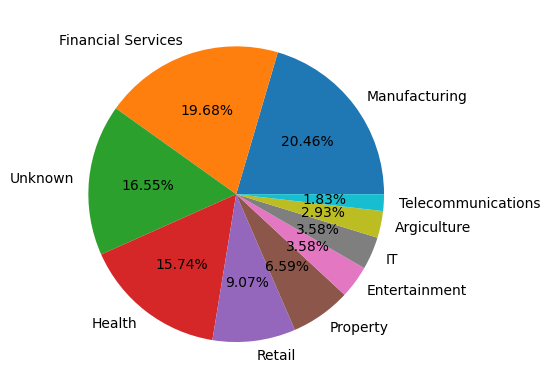

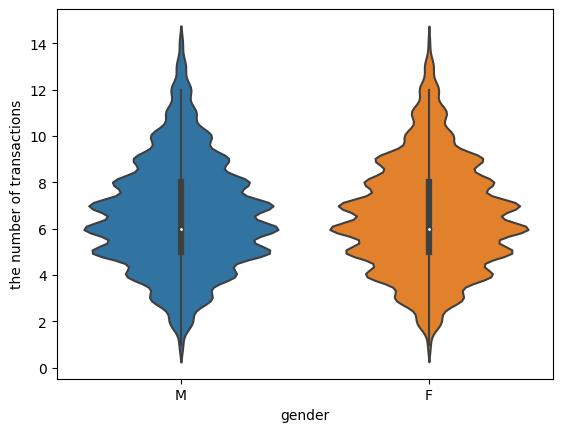

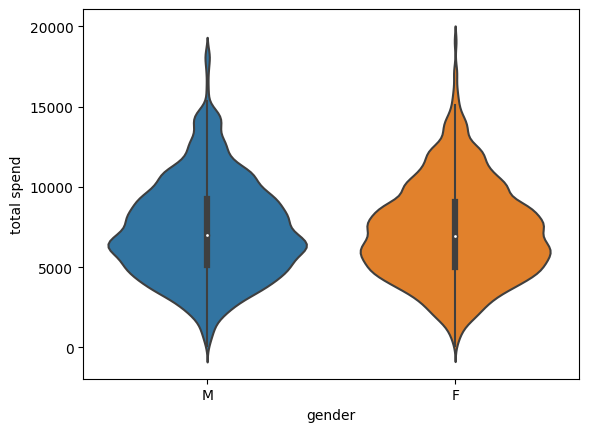

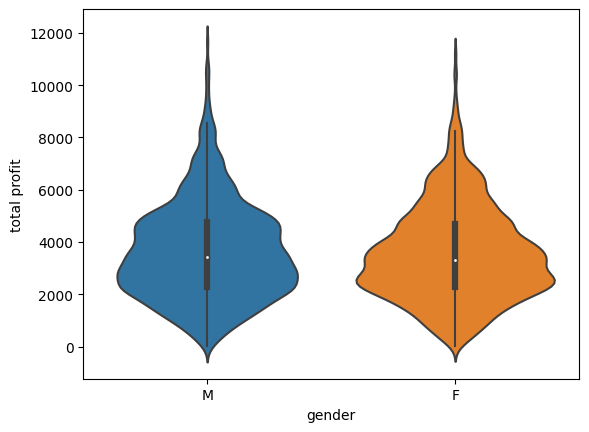

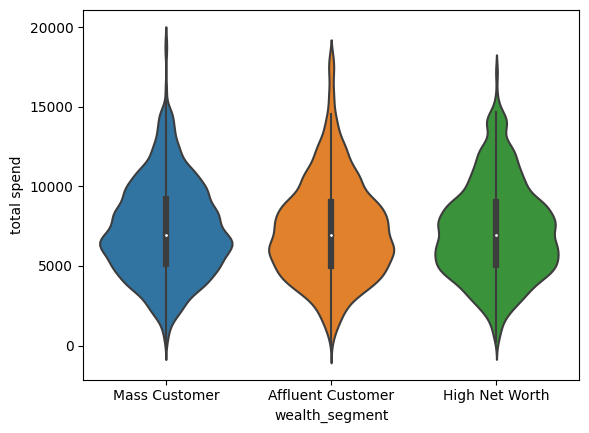

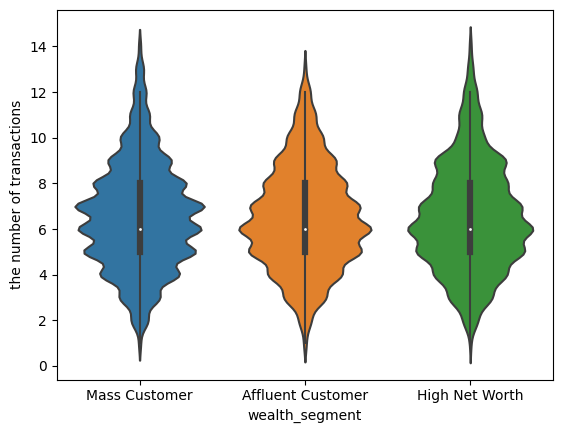

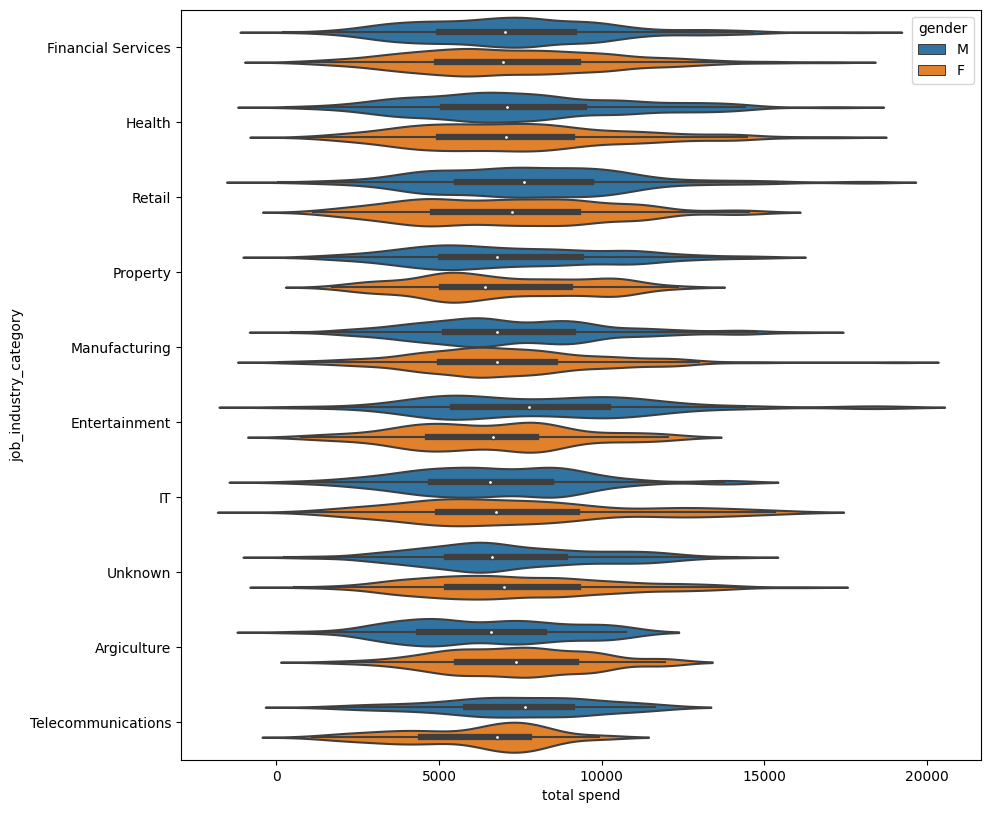

In [142]:
# # draw some plots for clustering 
# ##job_industry_category
# df_industry = clustering_data['job_industry_category'].value_counts()
# p_labels = ['Manufacturing', 'Financial Services', 'Unknown', 'Health',\
#             'Retail', 'Property', 'Entertainment', 'IT', 'Argiculture',\
#             'Telecommunications']
# plt.pie(df_industry, labels = p_labels, autopct='%0.2f%%')
# plt.show()

# sns.violinplot(data=clustering_data, x='gender', y='n_transactions')
# # sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
# plt.xlabel('gender')
# plt.ylabel('the number of transactions')
# plt.show()

# sns.violinplot(data=clustering_data, x='gender', y='total_spend')
# # sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
# plt.xlabel('gender')
# plt.ylabel('total spend')
# plt.show()

# sns.violinplot(data=clustering_data, x='gender', y='sum_profit')
# # sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
# plt.xlabel('gender')
# plt.ylabel('total profit')
# plt.show()

# sns.violinplot(data=clustering_data, x='wealth_segment', y='total_spend')
# # sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
# plt.xlabel('wealth_segment')
# plt.ylabel('total spend')
# plt.show()

# sns.violinplot(data=clustering_data, x='wealth_segment', y='n_transactions')
# # sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
# plt.xlabel('wealth_segment')
# plt.ylabel('the number of transactions')
# plt.show()

# plt.figure(figsize=(10,10))
# sns.violinplot(data=clustering_data, y='job_industry_category', x='total_spend', hue='gender')
# # sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
# plt.ylabel('job_industry_category')
# plt.xlabel('total spend')
# plt.subplots_adjust(bottom=0.15, top=0.9,left=0.1, right=0.9)
# plt.show()